In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
df_data=pd.read_table('genetic_data.txt',sep=" ")
print(df_data.head())
print(df_data.iloc[:4,:])

   Generation         x         y     f(x,y)   fitness
0           0  0.152747  0.095604   1.240170  0.289335
1           0  1.070700  1.125640   0.048048  0.953088
2           0  1.070700  1.125640   0.048048  0.953088
3           0 -0.550549  0.000366  11.569300  0.000009
4           0 -0.550549  0.000366  11.569300  0.000009
   Generation         x         y     f(x,y)   fitness
0           0  0.152747  0.095604   1.240170  0.289335
1           0  1.070700  1.125640   0.048048  0.953088
2           0  1.070700  1.125640   0.048048  0.953088
3           0 -0.550549  0.000366  11.569300  0.000009


/Users/samuelruhl/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [88]:
#split in Generations
generations=[]
count=0
before=0
tmp_list=[]
for i,gen in enumerate(df_data["Generation"]):
    if gen!=count:
        generations.append(df_data.iloc[before:i-1,:])
        before=i-1
        count+=1
print(generations[9]['fitness'].max())

0.991295


In [89]:
#find fittest per Generation
fitest=[]
best_sol_x=[]
best_sol_y=[]
for i,gen in enumerate(generations):
    fitest.append(generations[i]['fitness'].max())
    for j,ele in enumerate(generations[i]['fitness']):
        if (generations[i]['fitness'].iloc[j]==fitest[i]):
            best_sol_x.append(generations[i]['x'].iloc[j])
            best_sol_y.append(generations[i]['y'].iloc[j])

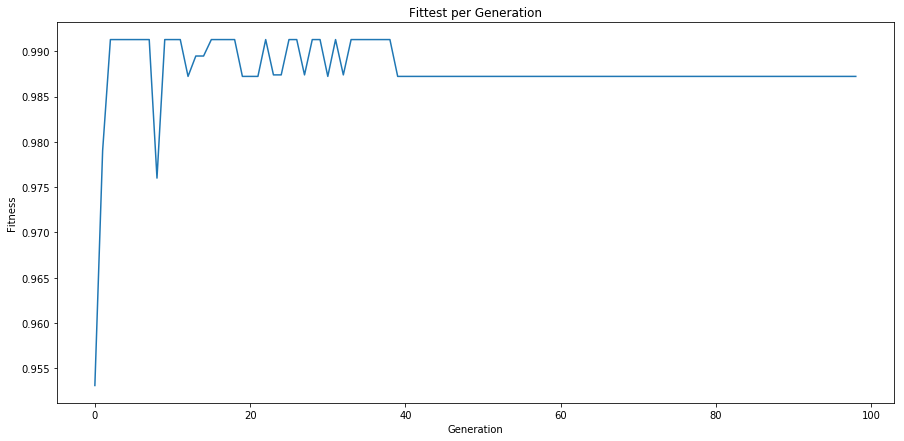

In [90]:
plt.figure(figsize=(15,7))
plt.plot(fitest)
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.title('Fittest per Generation')
plt.savefig('Fittest.png')

In [84]:
def f(x,y):
    return 100*x**4-200*x**2*y+100*y**2+x**2-2*x+1

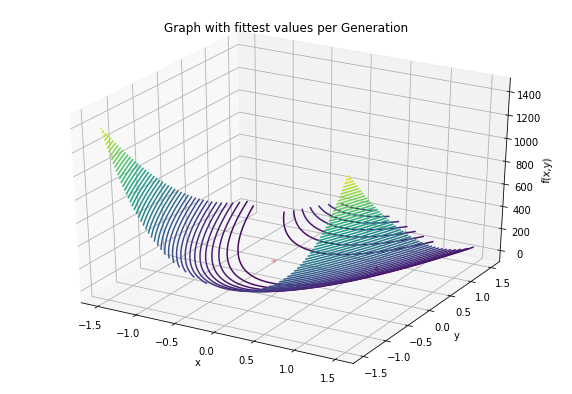

In [85]:
#3D plot, best solution per Generation
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Graph with fittest values per Generation')
ax.scatter(best_sol_x,best_sol_y,marker='+',c='r')
r = np.linspace(1.5,-1.5,100) 
x, y = np.meshgrid(r,r)
#ax.plot(x,y,f(x,y))
ax.contour3D(x,y,f(x,y),50) 
plt.savefig('Graph.png')